In [1]:
import numpy as np
from mvlearn.cluster.mv_coreg_spectral import MultiviewCoRegSpectralClustering
import matplotlib.pyplot as plt

%matplotlib inline
RANDOM_SEED=10

In [2]:
def display_plots(pre_title, data, labels):
    
    # plot the views
    plt.figure()
    fig, ax = plt.subplots(1,3, figsize=(18,5))
    dot_size=10
    ax[0].scatter(data[0][:, 0], data[0][:, 1],c=labels,s=dot_size)
    ax[0].set_title(pre_title + ' View 1')
    ax[0].axes.get_xaxis().set_visible(False)
    ax[0].axes.get_yaxis().set_visible(False)

    ax[1].scatter(data[1][:, 0], data[1][:, 1],c=labels,s=dot_size)
    ax[1].set_title(pre_title + ' View 2')
    ax[1].axes.get_xaxis().set_visible(False)
    ax[1].axes.get_yaxis().set_visible(False)
    
    ax[2].scatter(data[2][:, 0], data[1][:, 1],c=labels,s=dot_size)
    ax[2].set_title(pre_title + ' View 2')
    ax[2].axes.get_xaxis().set_visible(False)
    ax[2].axes.get_yaxis().set_visible(False)

    plt.show()

In [3]:
# Import the data and matlab results
X1 = np.loadtxt('../Coreg_Validation/X1.csv', delimiter=',')
X2 = np.loadtxt('../Coreg_Validation/X2.csv', delimiter=',')
X3 = np.loadtxt('../Coreg_Validation/X3.csv', delimiter=',')
matlab_clusters = np.loadtxt('../Coreg_Validation/matlab_clusters.csv', delimiter=',')
matlab_obj = np.loadtxt('../Coreg_Validation/objective.csv', delimiter=',')

In [4]:
data = [X1, X2, X3]
matlab_clusters = matlab_clusters

In [5]:
# Running spectral clustering
lam = 0.5
max_iter = 6
spectral = MultiviewCoRegSpectralClustering(n_clusters=2, 
                    n_views=3, v_lambda=lam, max_iter=max_iter, n_init=1)
predictions = spectral.fit_predict(data)
objective = spectral._objective

[[-0.98705068 -0.1604087 ]
 [-0.5949766   0.80374303]
 [-0.58015013  0.81450957]
 [-0.61950722  0.78499096]
 [-0.92299166  0.38481996]
 [-0.47701627 -0.87889447]]
[[ 0.03349329 -0.02260726]
 [ 0.03010516  0.04064591]
 [ 0.02924627  0.03801132]
 ...
 [ 0.02208021  0.03820189]
 [ 0.03297485 -0.02675943]
 [ 0.03031213  0.04008273]]
[[ 0.03346811 -0.02571474]
 [ 0.03013397  0.03977207]
 [ 0.02930873  0.03736807]
 ...
 [ 0.02245538  0.03728046]
 [ 0.03312253 -0.02667088]
 [ 0.03033422  0.03922462]]
[[ 0.03350985 -0.02786398]
 [ 0.03016103  0.0392988 ]
 [ 0.02935855  0.03693059]
 ...
 [ 0.02257436  0.03698774]
 [ 0.03315428 -0.02607993]
 [ 0.030362    0.03874742]]
[[ 0.03354714 -0.02896616]
 [ 0.0301771   0.03902812]
 [ 0.02937884  0.03668792]
 ...
 [ 0.02261309  0.03678507]
 [ 0.03315475 -0.02580465]
 [ 0.03037806  0.03847628]]
[[ 0.03357109 -0.0295584 ]
 [ 0.03018637  0.03887883]
 [ 0.02938886  0.03655327]
 ...
 [ 0.02262748  0.03666957]
 [ 0.03315018 -0.02565012]
 [ 0.03038732  0.03832688

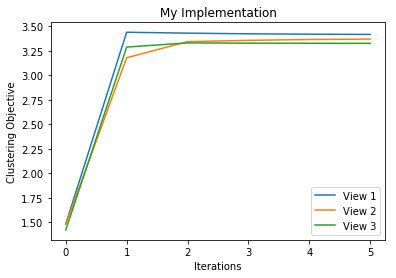

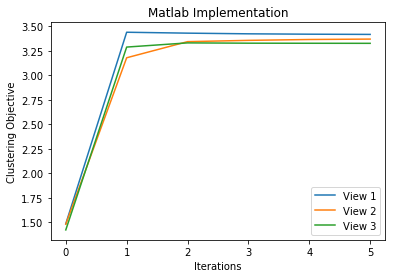

In [6]:
leg = ['View 1', 'View 2', 'View 3']

x_vals = np.arange(max_iter)
plt.plot(x_vals, objective.T)
plt.title('My Implementation')
plt.xlabel('Iterations')
plt.ylabel('Clustering Objective')
plt.legend(leg)
plt.show()

x_vals = np.arange(max_iter)
plt.plot(x_vals, matlab_obj.T)
plt.title('Matlab Implementation')
plt.xlabel('Iterations')
plt.ylabel('Clustering Objective')
plt.legend(leg)
plt.show()

<Figure size 432x288 with 0 Axes>

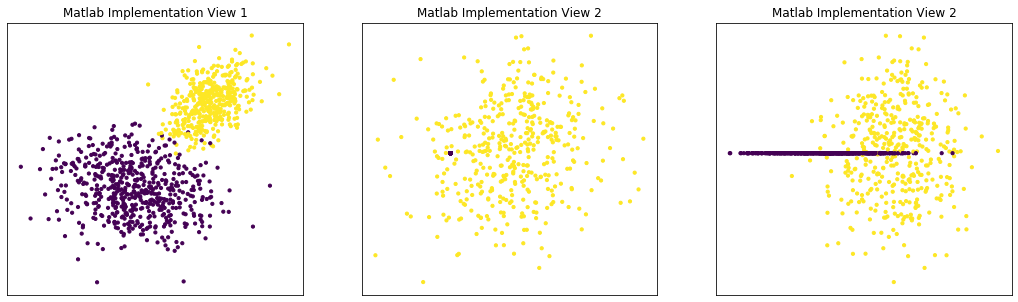

<Figure size 432x288 with 0 Axes>

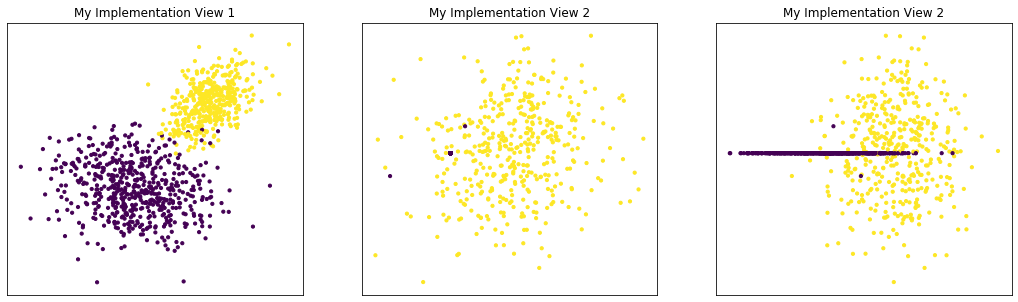

In [7]:
display_plots('Matlab Implementation', data, matlab_clusters)
display_plots('My Implementation', data, predictions)